# I. Chargement et exploitation des données

In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importation du fichier csv
df = pd.read_excel ("Risque_depression.xlsx")
df

,Horodateur,Pseudo_nom,Age,Genre,Situation_profession,Temps journalier de sommeil,Difficultés à dormir,Réveils fréquents pendant la nuit,Habitudes alimentaires régulières,"Consommation de l'alcool, cigarettes ou autres régulièrement",...,Problèmes relationnels,"Difficultés scolaires, académiques ou professionnelles",Changements majeurs dans la vie,Maladie physique,Difficultés financières,Faible estime de soi,Troubles émotionnels non résolus,Vie dans un quartier difficile,Niveau de stress actuel sur une échelle de 1 à 10,Autres informations importantes à partager
0,2024-06-09 00:48:22.343,MJ,24,Féminin,Chômeur,8,1,0,0,0,...,1,0,0,0,1,0,1,1,6,NaN
1,2024-06-09 01:12:56.143,Raymond ray,27,Masculin,Salarié,5,1,1,0,0,...,1,1,1,0,1,0,1,0,5,NaN
2,2024-06-09 01:40:06.161,Ibikiv,28,Masculin,Salarié,7,1,1,0,0,...,1,0,0,0,0,0,1,1,7,NaN
3,2024-06-09 01:50:00.713,Marie-Jo,27,Féminin,Chômeur,4,1,1,0,0,...,1,1,1,0,1,1,0,0,6,NaN
4,2024-06-09 01:51:01.601,Bel,20,Féminin,Etudiant,5,1,1,0,0,...,1,1,1,0,1,1,1,1,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2024-06-10 19:36:01.134,Elle,23,Féminin,Etudiant,7,0,1,0,0,...,1,1,0,0,0,0,1,0,5,NaN
297,2024-06-10 19:56:16.857,Kibaroma,19,Féminin,Etudiant,8,0,0,0,1,...,1,1,1,0,1,1,1,0,10,NaN
298,2024-06-10 19:58:24.846,Yoo,22,Féminin,Etudiant,7,1,1,0,0,...,1,1,0,0,0,0,1,0,7,NaN
299,2024-06-10 20:04:30.539,NaN,26,Masculin,Etudiant,5,0,0,0,0,...,0,0,0,0,1,0,0,0,3,Non


# II. Analyse Exploratoire des données, Nettoyage et Préparation des données

In [3]:
# Exploration des données
df.describe ()

,Horodateur,Age,Temps journalier de sommeil,Difficultés à dormir,Réveils fréquents pendant la nuit,Habitudes alimentaires régulières,"Consommation de l'alcool, cigarettes ou autres régulièrement",Temps moyen sur les réseaux sociaux,Pression ou anxiété liée aux réseaux sociaux,Victime de cyberintimidation\n,...,Pensées négatives récurrentes,Problèmes relationnels,"Difficultés scolaires, académiques ou professionnelles",Changements majeurs dans la vie,Maladie physique,Difficultés financières,Faible estime de soi,Troubles émotionnels non résolus,Vie dans un quartier difficile,Niveau de stress actuel sur une échelle de 1 à 10
count,301,301.000000,301.000000,301.00000,301.000000,301.000000,301.000000,298.000000,301.000000,301.000000,...,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2024-06-09 20:43:40.340465152,26.418605,6.299003,0.38206,0.528239,0.448505,0.202658,7.127796,0.365449,0.136213,...,0.408638,0.558140,0.431894,0.445183,0.046512,0.687708,0.338870,0.395349,0.222591,4.508306
min,2024-06-09 00:48:22.343000,16.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-06-09 11:01:21.040999936,23.000000,5.000000,0.00000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2024-06-09 19:42:18.732999936,25.000000,6.000000,0.00000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000
75%,2024-06-10 06:55:05.247000064,28.000000,7.000000,1.00000,1.000000,1.000000,0.000000,10.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,6.000000
max,2024-06-10 20:05:02.653000,54.000000,12.000000,1.00000,1.000000,1.000000,1.000000,24.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000
std,NaN,5.594419,1.434213,0.48670,0.500033,0.498169,0.402649,5.611428,0.482358,0.343585,...,0.492401,0.497435,0.496165,0.497814,0.210941,0.464200,0.474114,0.489740,0.416679,2.337541


In [4]:
# Recherche des valeurs manquantes
df.isnull().sum()

Horodateur                                                        0
Pseudo_nom                                                       57
Age                                                               0
Genre                                                             0
Situation_profession                                              0
Temps journalier de sommeil                                       0
Difficultés à dormir                                              0
Réveils fréquents pendant la nuit                                 0
Habitudes alimentaires régulières                                 0
Consommation de l'alcool, cigarettes ou autres régulièrement      0
Temps moyen sur les réseaux sociaux                               3
Pression ou anxiété liée aux réseaux sociaux                      0
Victime de cyberintimidation\n                                    0
Vécu récent des événements stressants                             0
Antécédents de maltraitance ou de traumatismes  

In [5]:
# Affectation de la moyenne aux valeurs manquantes de temps sur les réseaux sociaux
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')
df[["Temps moyen sur les réseaux sociaux"]] = imputer.fit_transform(df[["Temps moyen sur les réseaux sociaux"]])
df["Temps moyen sur les réseaux sociaux"] = df[["Temps moyen sur les réseaux sociaux"]]

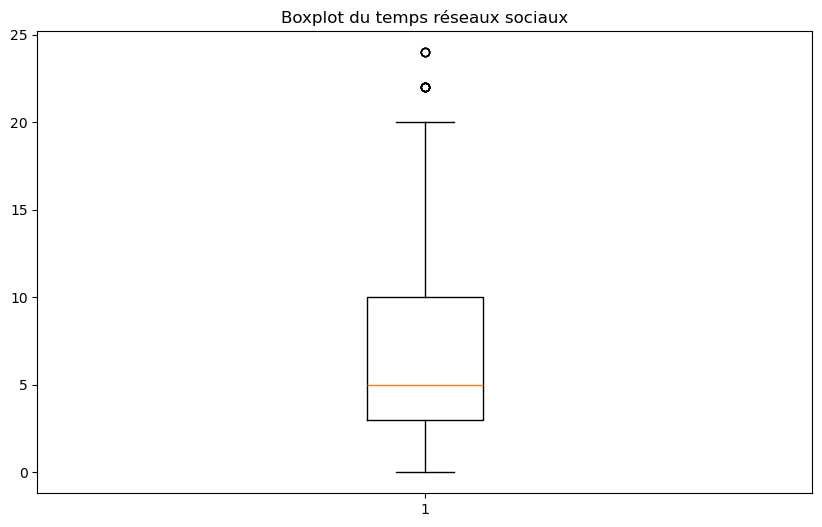

les valeurs aberrantes du temps sur les réseaux sociaux sont :                  Horodateur   Pseudo_nom  Age     Genre Situation_profession  \
3   2024-06-09 01:50:00.713    Marie-Jo    27   Féminin              Chômeur   
27  2024-06-09 07:54:24.631          NaN   30   Féminin             Etudiant   
65  2024-06-09 10:09:15.091     Unefille   26   Féminin              Chômeur   
68  2024-06-09 10:20:28.486      Mylène    27   Féminin         Entrepreneur   
81  2024-06-09 11:21:53.485     Dencepru   24   Féminin             Etudiant   
147 2024-06-09 19:32:04.292          Bbb   22   Féminin             Etudiant   
154 2024-06-09 19:55:10.972        Loïc    26  Masculin             Etudiant   
178 2024-06-09 21:39:21.486  L'empereur    20  Masculin             Etudiant   
213 2024-06-10 02:57:39.508      Dorcas    24   Féminin         Entrepreneur   
218 2024-06-10 05:09:01.198      Barcola   18  Masculin             Etudiant   
233 2024-06-10 07:31:53.197        Tiff    23   Féminin  

In [6]:
# Recherche des valeurs aberrantes
# Colonne du temps sur les réseaux sociaux
plt.figure (figsize = (10,6))
plt.boxplot(df["Temps moyen sur les réseaux sociaux"])
plt.title("Boxplot du temps réseaux sociaux")
plt.show ()
Q1 = df["Temps moyen sur les réseaux sociaux"].quantile(0.25)
Q3 = df["Temps moyen sur les réseaux sociaux"].quantile(0.75)
IQR = Q3 - Q1
seuil_inf = Q1 - 1.5*IQR
seuil_sup = Q3 + 1.5*IQR
valeurs_aberrantes_réseau = df[(df["Temps moyen sur les réseaux sociaux"]< seuil_inf)|(df["Temps moyen sur les réseaux sociaux"]> seuil_sup)]
print ("les valeurs aberrantes du temps sur les réseaux sociaux sont :", valeurs_aberrantes_réseau)

In [7]:
seuil_sup

20.5

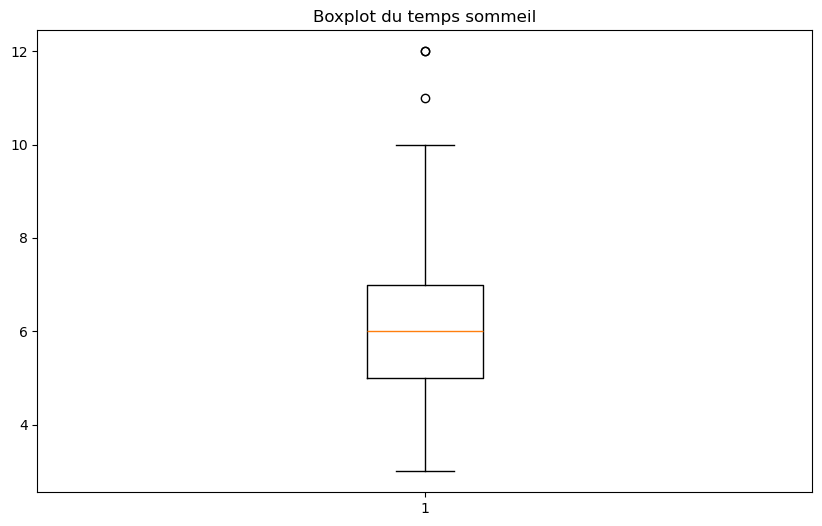

les valeurs aberrantes du temps de sommeil sont :                  Horodateur Pseudo_nom  Age    Genre Situation_profession  \
167 2024-06-09 20:36:35.556        NaN   20  Féminin             Etudiant   
175 2024-06-09 21:16:12.971        Yas   24  Féminin              Chômeur   
248 2024-06-10 09:59:38.933     Annie    20  Féminin             Etudiant   

     Temps journalier de sommeil   Difficultés à dormir  \
167                            11                     1   
175                            12                     0   
248                            12                     0   

     Réveils fréquents pendant la nuit  Habitudes alimentaires régulières  \
167                                  1                                  0   
175                                  1                                  0   
248                                  1                                  1   

     Consommation de l'alcool, cigarettes ou autres régulièrement  ...  \
167                  

In [8]:
# Recherche des valeurs aberrantes
# Colonne du temps de sommeil
plt.figure (figsize = (10,6))
plt.boxplot(df["Temps journalier de sommeil "])
plt.title("Boxplot du temps sommeil")
plt.show ()
Q1 = df["Temps journalier de sommeil "].quantile(0.25)
Q3 = df["Temps journalier de sommeil "].quantile(0.75)
IQR = Q3 - Q1
seuil_inf1 = Q1 - 1.5*IQR
seuil_sup1 = Q3 + 1.5*IQR
valeurs_aberrantes_sommeil = df[(df["Temps journalier de sommeil "]< seuil_inf1)|(df["Temps journalier de sommeil "]> seuil_sup1)]
print ("les valeurs aberrantes du temps de sommeil sont :", valeurs_aberrantes_sommeil)

In [9]:
seuil_sup1

10.0

In [10]:
# Encodage de la colonne "Genre"
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder (categories = [["Masculin","Féminin"]])
df["Genre_encoded"]= encoder.fit_transform(df[["Genre"]])
df["Genre_encoded"]

0      1.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
296    1.0
297    1.0
298    1.0
299    0.0
300    1.0
Name: Genre_encoded, Length: 301, dtype: float64

In [11]:
df

,Horodateur,Pseudo_nom,Age,Genre,Situation_profession,Temps journalier de sommeil,Difficultés à dormir,Réveils fréquents pendant la nuit,Habitudes alimentaires régulières,"Consommation de l'alcool, cigarettes ou autres régulièrement",...,"Difficultés scolaires, académiques ou professionnelles",Changements majeurs dans la vie,Maladie physique,Difficultés financières,Faible estime de soi,Troubles émotionnels non résolus,Vie dans un quartier difficile,Niveau de stress actuel sur une échelle de 1 à 10,Autres informations importantes à partager,Genre_encoded
0,2024-06-09 00:48:22.343,MJ,24,Féminin,Chômeur,8,1,0,0,0,...,0,0,0,1,0,1,1,6,NaN,1.0
1,2024-06-09 01:12:56.143,Raymond ray,27,Masculin,Salarié,5,1,1,0,0,...,1,1,0,1,0,1,0,5,NaN,0.0
2,2024-06-09 01:40:06.161,Ibikiv,28,Masculin,Salarié,7,1,1,0,0,...,0,0,0,0,0,1,1,7,NaN,0.0
3,2024-06-09 01:50:00.713,Marie-Jo,27,Féminin,Chômeur,4,1,1,0,0,...,1,1,0,1,1,0,0,6,NaN,1.0
4,2024-06-09 01:51:01.601,Bel,20,Féminin,Etudiant,5,1,1,0,0,...,1,1,0,1,1,1,1,5,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2024-06-10 19:36:01.134,Elle,23,Féminin,Etudiant,7,0,1,0,0,...,1,0,0,0,0,1,0,5,NaN,1.0
297,2024-06-10 19:56:16.857,Kibaroma,19,Féminin,Etudiant,8,0,0,0,1,...,1,1,0,1,1,1,0,10,NaN,1.0
298,2024-06-10 19:58:24.846,Yoo,22,Féminin,Etudiant,7,1,1,0,0,...,1,0,0,0,0,1,0,7,NaN,1.0
299,2024-06-10 20:04:30.539,NaN,26,Masculin,Etudiant,5,0,0,0,0,...,0,0,0,1,0,0,0,3,Non,0.0


In [12]:
# Suppression des données de type texte et date
df1 =df.drop (columns =["Pseudo_nom","Genre","Situation_profession","Horodateur","Autres informations importantes à partager","Symptômes de dépression","Causes potentielles de dépression"])

# III. Régression logistique sur le dataset 

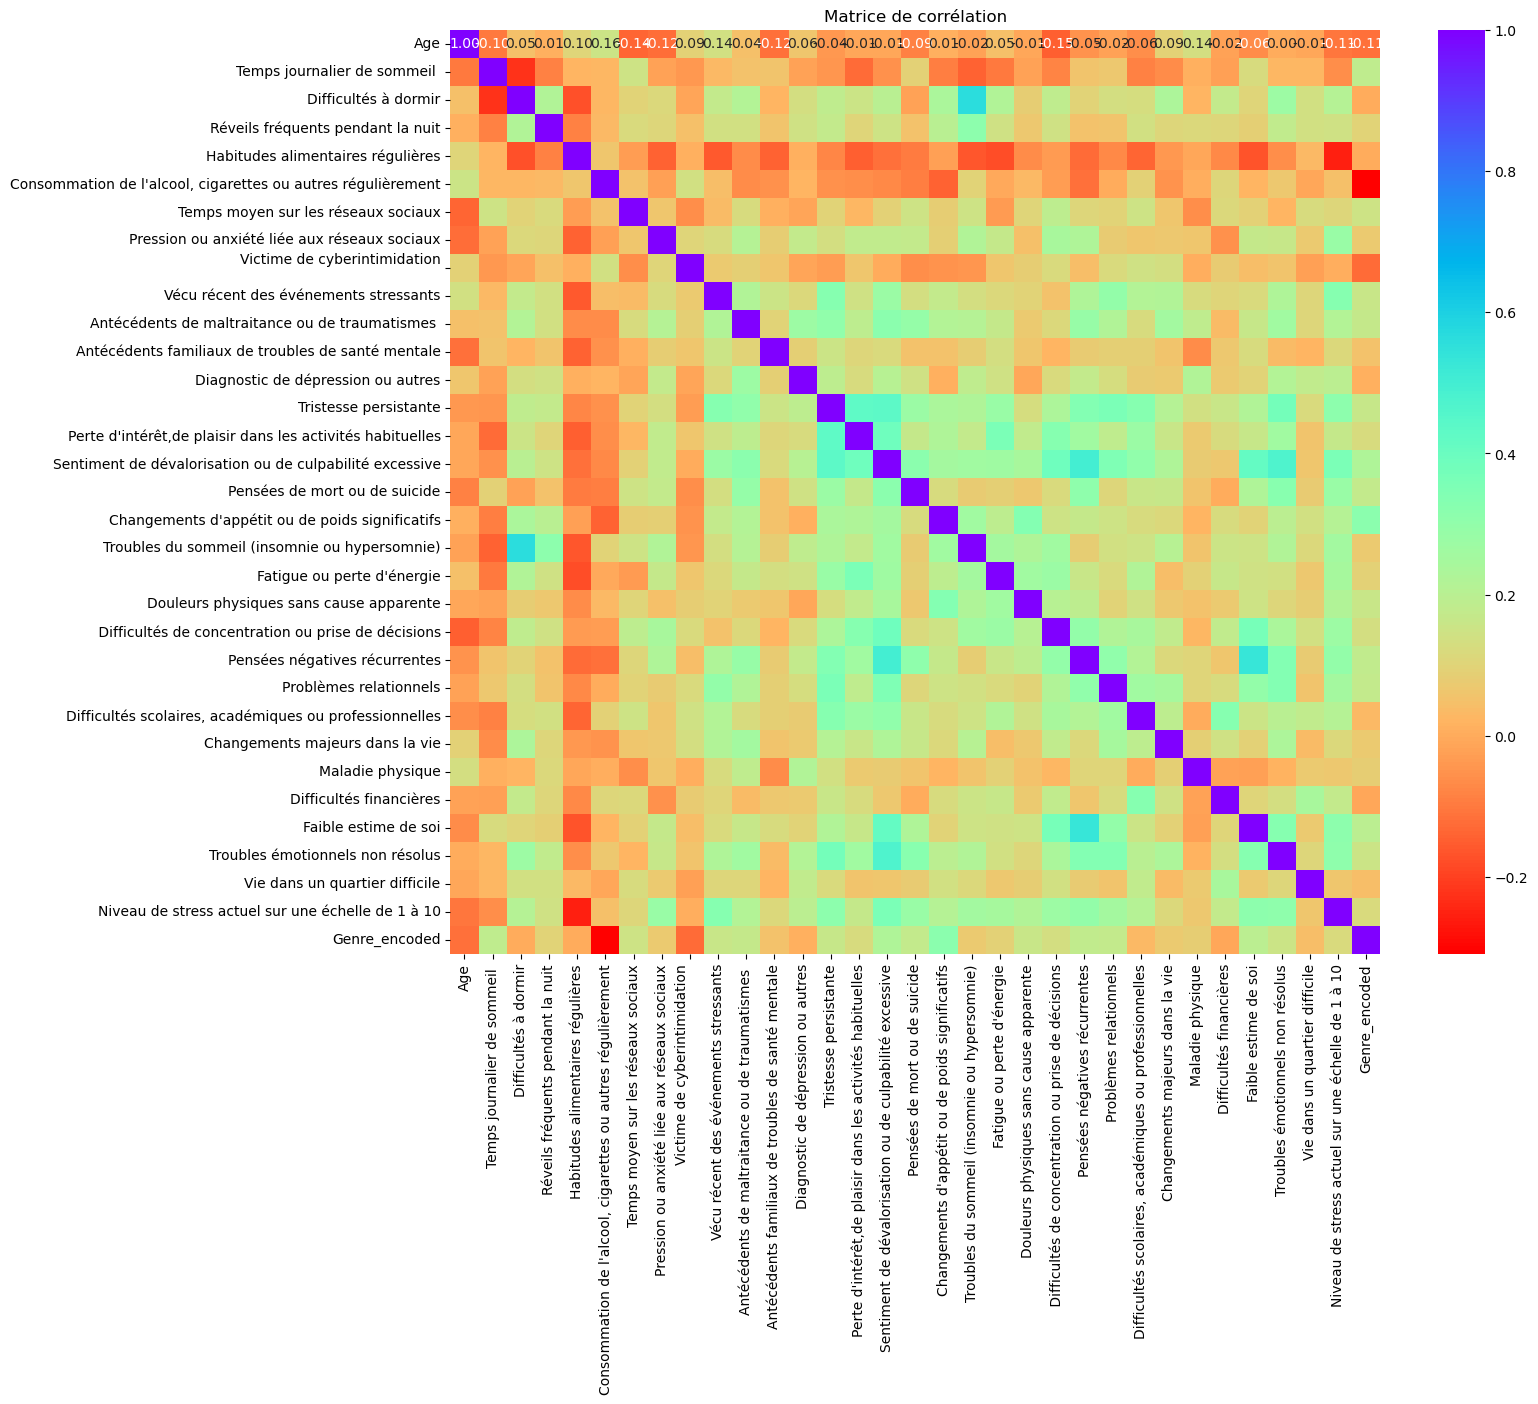

In [13]:
# Matrice de corrélation
plt.figure(figsize = (15,12))
sns.heatmap(df1.corr(), annot = True, cmap ='rainbow_r', fmt ='.2f')
plt.title ('Matrice de corrélation')
plt.show()

In [14]:
# Vérification des types de données pris en compte dans le modèle
df1.dtypes

Age                                                               int64
Temps journalier de sommeil                                       int64
Difficultés à dormir                                              int64
Réveils fréquents pendant la nuit                                 int64
Habitudes alimentaires régulières                                 int64
Consommation de l'alcool, cigarettes ou autres régulièrement      int64
Temps moyen sur les réseaux sociaux                             float64
Pression ou anxiété liée aux réseaux sociaux                      int64
Victime de cyberintimidation\n                                    int64
Vécu récent des événements stressants                             int64
Antécédents de maltraitance ou de traumatismes                    int64
Antécédents familiaux de troubles de santé mentale                int64
Diagnostic de dépression ou autres                                int64
Tristesse persistante                                           

In [15]:
# importation du modèle de regression logistique
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
# construction du train_set et du test_set
X = df1
y = df['Diagnostic de dépression ou autres']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

# Initialisation du modèle
model =LogisticRegression()

# Train models and evaluate
model.fit(X_train, y_train)
print(f'La précision du modèle est de: {model.score(X_test, y_test)}')

La précision du modèle est de: 0.9672131147540983


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# IV. Prédictions et Evaluation du modèle

In [17]:
# Prédictions à base du modèle
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [18]:
# Evaluation et Affichage des paramètres de la classification_report et matrice de confusion
print('Regression Logistique')
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Regression Logistique
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       1.00      0.50      0.67         4

    accuracy                           0.97        61
   macro avg       0.98      0.75      0.82        61
weighted avg       0.97      0.97      0.96        61

[[57  0]
 [ 2  2]]


Text(0.5, 1.0, 'Matrice de confusion')

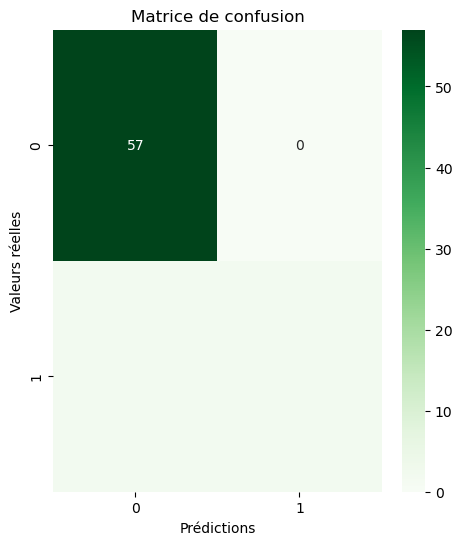

In [19]:
# Génération du graphique de la matrice de confusion
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix, annot=True, cmap="Greens")
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion')

In [20]:
# calcul du score du modèle de prédiction
print(f'La précision du modèle de prédiction est de: {accuracy_score(y_test,y_pred)}')

La précision du modèle de prédiction est de: 0.9672131147540983


# V. Optimisation du modèle de régression linéaire par validation croisée

In [21]:
# Importation de l'algorithme
from sklearn.model_selection import cross_val_score

In [22]:
# Entraînement de l'algorithme d'optimisation
scores = cross_val_score (model,X_train,y_train, cv =5)
print("Scores de validation croisée :", scores)
print("précision moyenne:%0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Scores de validation croisée : [1.         0.97916667 0.95833333 0.95833333 0.95833333]
précision moyenne:0.97 (+/- 0.03)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# VI. Modèle KNN sur le modèle et évaluation

In [23]:
# Initiation du modèle KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)

In [24]:
# Normalisation des données
scaler = StandardScaler ()
X_train_nor= scaler.fit_transform(X_train)
X_test_nor= scaler.fit_transform(X_test)

In [25]:
# Entrainement du modèle
model_knn.fit(X_train_nor, y_train)

KNeighborsClassifier()

In [26]:
# Prédiction avec le modèle KNN
y_predKNN = model_knn.predict(X_test_nor)

In [27]:
# Matrice de confusion du modèle
conf_matrixKNN= confusion_matrix(y_test, y_predKNN)
print("Matrice de confusion pour KNN :\n", conf_matrixKNN)

Matrice de confusion pour KNN :
 [[57  0]
 [ 2  2]]


Text(0.5, 1.0, 'Matrice de confusion - k-NN')

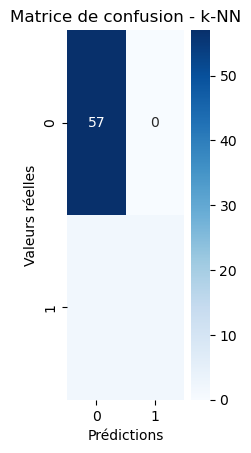

In [28]:
# Génération deu graphique de matrice de confusion pour KNN
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrixKNN, annot=True, cmap="Blues")
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion - k-NN')

In [29]:
# calcul du score du modèle de prédiction avec KNN
print(f'La précision du modèle de prédiction est de: {accuracy_score(y_test,y_predKNN)}')

La précision du modèle de prédiction est de: 0.9672131147540983


# VII. Optimisation du modèle KNN par Random Search

In [30]:
# Importation de l'algorithme
from sklearn.model_selection import RandomizedSearchCV

In [31]:
# Définition de la distribution des hyperparamètres à tester
from scipy.stats import randint
param_dist = {
    'n_neighbors':randint(1,40),
    'metric':['euclidean','manhattan','chebyshev']
}

In [32]:
# Configuration de Random Search
Random_search = RandomizedSearchCV (model_knn,param_dist, n_iter = 50, cv = 5, random_state = 42)

In [33]:
# Entrainement du modèle avec Random Search
Random_search.fit(X_train_nor,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'chebyshev'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000164848C3B10>},
                   random_state=42)

In [34]:
# Affichage des meilleurs paramètres
print ("Meilleurs paramètres (Random Search):", Random_search.best_params_)

Meilleurs paramètres (Random Search): {'metric': 'chebyshev', 'n_neighbors': 8}


In [35]:
# Evaluation du modèle
y_pred = Random_search.predict(X_test_nor)
accuracy = accuracy_score(y_test, y_pred)
print ("Précision(Random Search):",accuracy)

Précision(Random Search): 1.0


# VIII. Optimisation du modèle KNN par Grid Search¶

In [36]:
# Importation de l'algorithme
from sklearn.model_selection import GridSearchCV

In [37]:
# Définition de la grille des hyperparamètres du modèle
param_grid = {
    'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23,25],
    'metric':['euclidean','manhattan']
}

In [38]:
# Configuration de Grid Search
grid_search = GridSearchCV (model_knn,param_grid, cv =5)

In [39]:
# Entrainement du modèle avec Grid Search
grid_search.fit(X_train_nor,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25]})

In [40]:
# Affichage des meilleurs paramètres
print ("Meilleurs paramètres (Grid Search):", grid_search.best_params_)

Meilleurs paramètres (Grid Search): {'metric': 'euclidean', 'n_neighbors': 7}


In [41]:
# Evaluation du modèle
y_pred = grid_search.predict(X_test_nor)
accuracy = accuracy_score(y_test, y_pred)
print ("Précision(Grid Search):",accuracy)

Précision(Grid Search): 0.9672131147540983
